## Wine Quality Dataset
Data source:
Kaggle: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error ,mean_squared_error,
    accuracy_score, classification_report)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC ,SVR
from sklearn.ensemble import RandomForestClassifier

## Data loading

In [2]:
data= pd.read_csv("/content/drive/MyDrive/WineQT.csv") 

In [55]:
print("Data size: ", data.shape)

Data size:  (1143, 13)


<b> Note: the dataset consists of 1143 entries and 13 columns <b/>

# 1. Data Exploration

In [4]:
data.head() #show the first 5 rows of the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
data.columns.values  #show columns name

array(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'Id'], dtype=object)

In [56]:
#check missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

<b> Note: the dataset does not have missing values <b/>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1143 entries, 0 to 1142

Data columns (total 13 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   fixed acidity         1143 non-null   float64

 1   volatile acidity      1143 non-null   float64

 2   citric acid           1143 non-null   float64

 3   residual sugar        1143 non-null   float64

 4   chlorides             1143 non-null   float64

 5   free sulfur dioxide   1143 non-null   float64

 6   total sulfur dioxide  1143 non-null   float64

 7   density               1143 non-null   float64

 8   pH                    1143 non-null   float64

 9   sulphates             1143 non-null   float64

 10  alcohol               1143 non-null   float64

 11  quality               1143 non-null   int64  

 12  Id                    1143 non-null   int64  

dtypes: float64(11), int64(2)

memory usage: 116.2 KB


<b> Note: the dataset has only float and integer values <b/>

In [8]:
# Describe dataset 
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


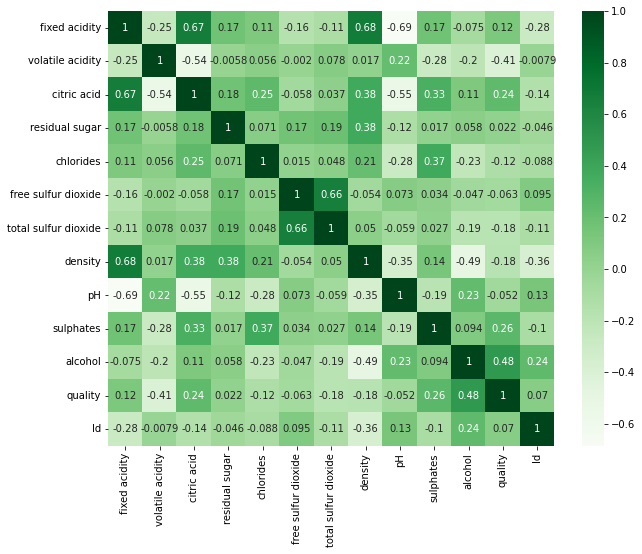

In [9]:
#check correlation
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),cmap='Greens', annot=True)

<b> Note: there are a correlation between fixed acidity and citric acid and density.
As well as between free sulfur dioxide & total sulfur dioxide. <b/>

## Correlation with Target variable


In [38]:
plt.figure(figsize=(14,6))
corr = data.corr()['quality'].sort_values(ascending=False)
corr

quality                 1.000000
alcohol                 0.484866
sulphates               0.257710
citric acid             0.240821
fixed acidity           0.121970
Id                      0.069708
residual sugar          0.022002
pH                     -0.052453
free sulfur dioxide    -0.063260
chlorides              -0.124085
density                -0.175208
total sulfur dioxide   -0.183339
volatile acidity       -0.407394
Name: quality, dtype: float64

<Figure size 1008x432 with 0 Axes>

<b> Note: 'residual sugar', "'pH', 'free sulfur dioxide' have a low correlation with the target variable "quality", so they will be dropped for the model building.<b/>

# 2. Distinct groups of wines based on wine quality

In [28]:
#Dependent variable (target)= quality 

print("The Value Quality ",data["quality"].unique())

The Value Quality  [5 6 7 4 8 3]


<b> Note: the dependent variable "quality" is categorical variable and it ranges from 1 to 10.<b/>

<b>There are 6 distinct groups of wines based on the quality = [3 4 5 6 7 8]<b/>

In [11]:
data.quality.value_counts()


5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

Text(0.5, 1.0, 'Target Distribution')

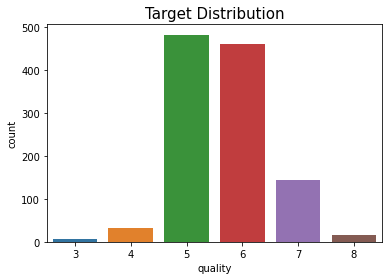

In [29]:
sns.countplot(x=data.quality).set_title('Target Distribution',size=15)

<b>Note: classes are imbalanced<b/>

In [12]:
grouped_quality= data.groupby("quality").mean()
grouped_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Id
quality,,,,,,,,,,,,
3,8.450000,0.897500,0.211667,2.666667,0.105333,8.166667,24.500000,0.997682,3.361667,0.550000,9.691667,1121.166667
4,7.809091,0.700000,0.165758,2.566667,0.094788,14.848485,40.606061,0.996669,3.391212,0.637879,10.260606,692.848485
5,8.161077,0.585280,0.240124,2.540476,0.091770,16.612836,55.299172,0.997073,3.302091,0.613375,9.902277,753.925466
6,8.317749,0.504957,0.263680,2.444805,0.085281,15.215368,39.941558,0.996610,3.323788,0.676537,10.655339,854.625541
7,8.851049,0.393671,0.386573,2.760140,0.075217,14.538462,37.489510,0.996071,3.287133,0.743566,11.482634,830.349650
8,8.806250,0.410000,0.432500,2.643750,0.070187,11.062500,29.375000,0.995553,3.240625,0.766250,11.937500,797.875000


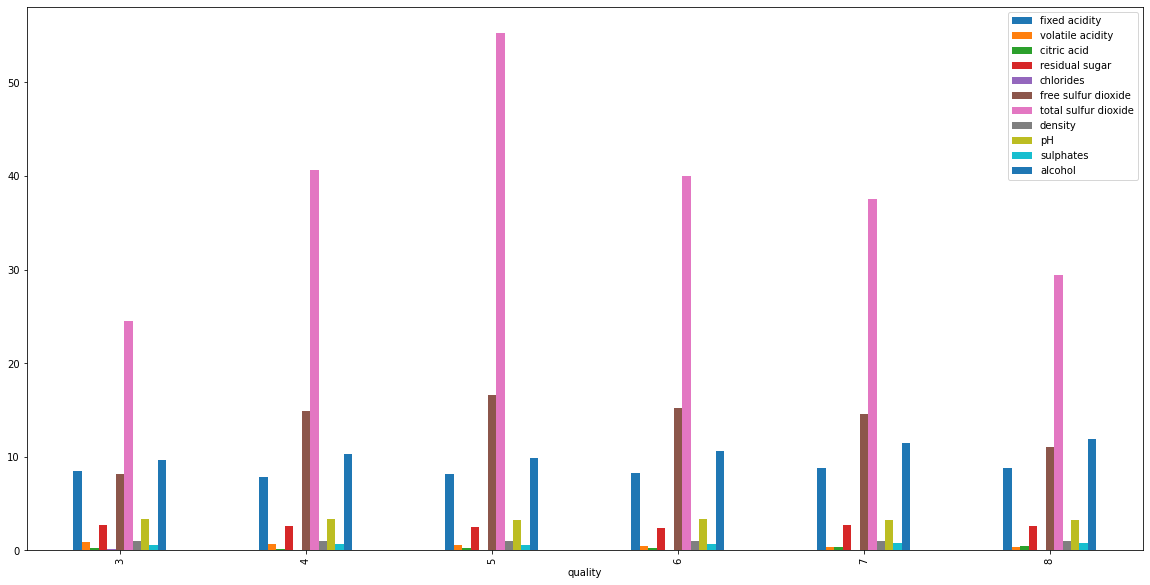

In [13]:
grouped_quality.drop(columns="Id",inplace=True)

grouped_quality.plot(kind="bar",figsize=(20,10))


# 3. Prediction model

In [42]:
#Defined X value and y value
X = data.drop(['Id','quality','free sulfur dioxide', 'pH', 'residual sugar'], axis=1)       
y = data["quality"]   

In [43]:
# split the data to train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (914, 8)

X Test  :  (229, 8)

Y Train :  (914,)

Y Test  :  (229,)


In [47]:
# Decision Tree Classifier
Tree_model=DecisionTreeClassifier(max_depth=10)
# fit model
Tree_model.fit(X_train,y_train)

y_pred =Tree_model.predict(X_test)

print("Test accuracy score " , accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))


Test accuracy score  0.537117903930131

              precision    recall  f1-score   support



           3       0.00      0.00      0.00         1

           4       0.00      0.00      0.00         7

           5       0.69      0.65      0.67       101

           6       0.44      0.52      0.48        84

           7       0.50      0.37      0.43        35

           8       0.00      0.00      0.00         1



    accuracy                           0.54       229

   macro avg       0.27      0.26      0.26       229

weighted avg       0.54      0.54      0.54       229




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
#support vector machines
svc_model=SVC(C=50,kernel="rbf")

# fit model
svc_model.fit(X_train,y_train)

y_pred =svc_model.predict(X_test)
print("Accuracy score " , accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))


Accuracy score  0.6244541484716157

              precision    recall  f1-score   support



           4       0.00      0.00      0.00         0

           5       0.83      0.67      0.74       120

           6       0.63      0.57      0.60       108

           7       0.04      1.00      0.07         1

           8       0.00      0.00      0.00         0



    accuracy                           0.62       229

   macro avg       0.30      0.45      0.28       229

weighted avg       0.73      0.62      0.67       229




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# Random Forest
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)
print("Accuracy score " , accuracy_score(y_test,y_pred))
print(classification_report(y_pred,y_test))

Accuracy score  0.7074235807860262

              precision    recall  f1-score   support



           4       0.00      0.00      0.00         0

           5       0.80      0.73      0.77       105

           6       0.68      0.68      0.68        99

           7       0.69      0.72      0.71        25

           8       0.00      0.00      0.00         0



    accuracy                           0.71       229

   macro avg       0.43      0.43      0.43       229

weighted avg       0.74      0.71      0.72       229




/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

  _warn_prf(average, modifier, msg_start, len(result))


<b>
    Note: Random Forest has the best accuracy score.

Advantages:
1. It reduces overfitting in decision trees and helps to improve accuracy. 
2. It does not require normalising the data as it depends on a rule-based approach.

Drawbacks:
It requires much computational power and time for training.
    <b/>

<b>
    Note: more work should be done to improve the performance as the dataset size is small and the target classes are imbalanced. Oversampling technique could be used to solve the imbalanced dataset issue.
    <b/>

By: Abeer Abuzayed [Linkedin](https://www.linkedin.com/in/abeer-abuzayed/) | [Twitter](https://twitter.com/aabuzayed1) | [Google Scholar](https://scholar.google.com/citations?user=sa52NEgAAAAJ&hl=en)